# Online Payments Fraud Detection system 
## Under Supervision of Dr.  Mushtaq Hussain
### Bc190204761 (Usman Ali)

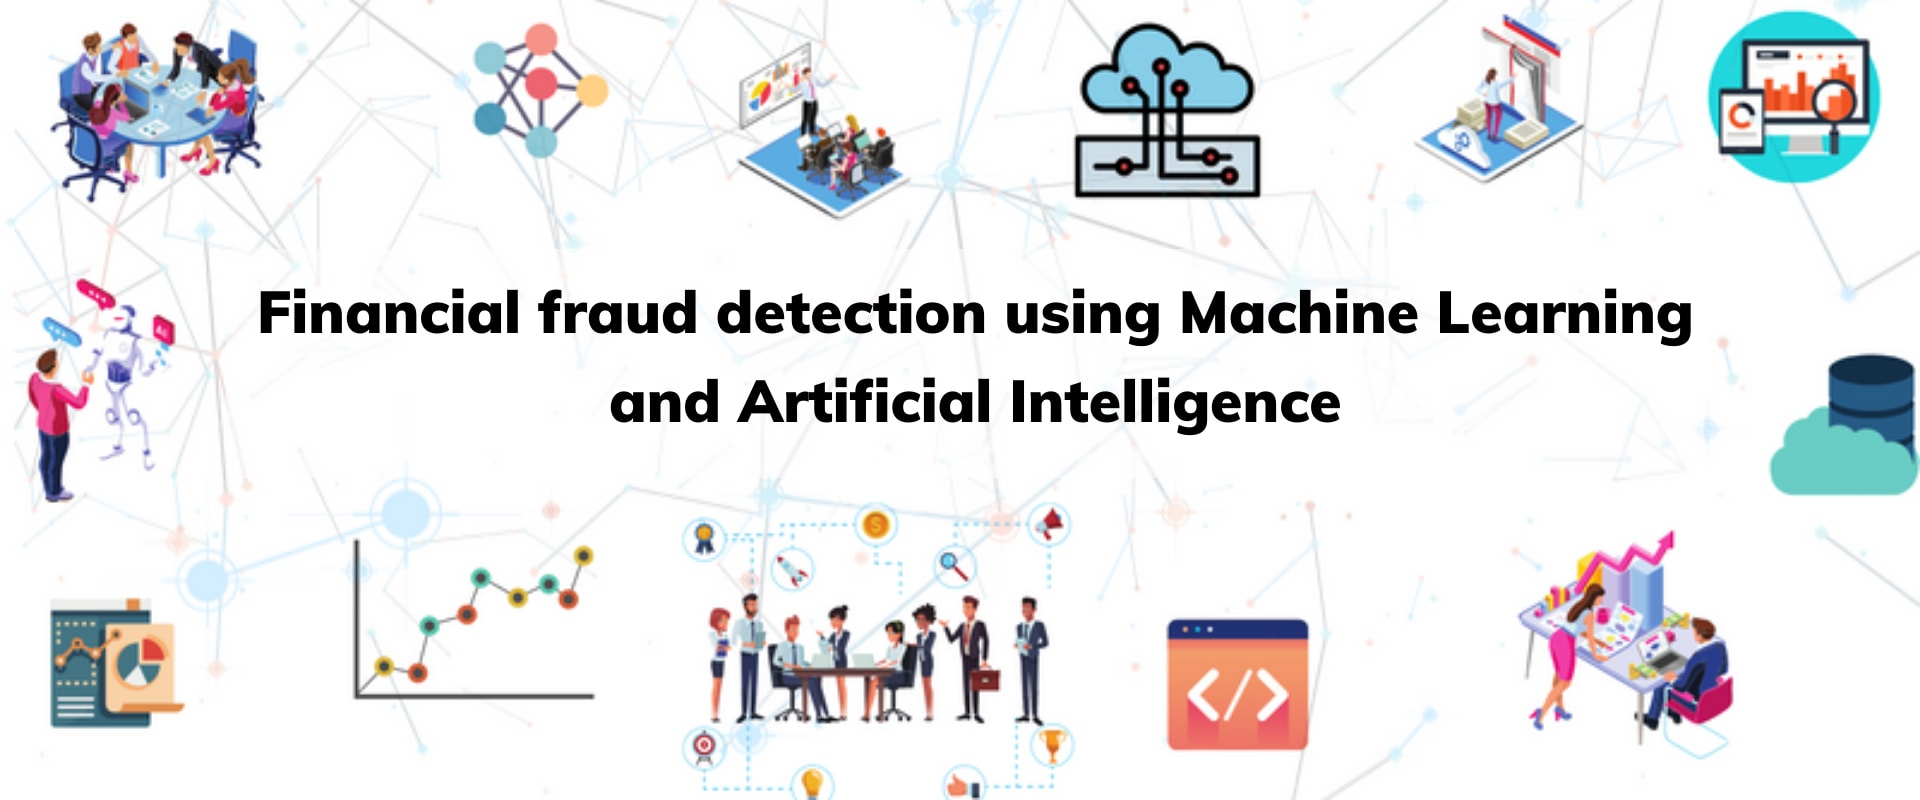

In [12]:
from IPython.display import Image
Image(filename='Financial-fraud-detection-using-Machine-Learning-and-Artificial-Intelligence.jpg')

In [3]:
#import Libraries 
import numpy as np
import pandas as pd
from pycaret.classification import *

You can downlaod the dataset form [Click here](https://www.kaggle.com/datasets/ealaxi/paysim1?resource=download )

In [4]:
data = pd.read_csv("PS_20174392719_1491204439457_log.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Data Analysis

In [5]:
print("Number of records:\t\t",data.shape[0])
print("Number of features per record:\t",data.shape[1])

Number of records:		 6362620
Number of features per record:	 11


In [6]:
print("Any missing data?",data.isnull().sum().any())

Any missing data? False


In [7]:
print("No of Valid transactions:",data.isFraud.value_counts()[0],'which is ',round(data.isFraud.value_counts()[0]/data.shape[0] * 100,2),'%')
print("No of Fraud transactions:",data.isFraud.value_counts()[1],'which is ',round(data.isFraud.value_counts()[1]/data.shape[0] * 100,2),'%')

data.isFraud.value_counts()

No of Valid transactions: 6354407 which is  99.87 %
No of Fraud transactions: 8213 which is  0.13 %


0    6354407
1       8213
Name: isFraud, dtype: int64

In [8]:
print("Any transaction with amount less than or equal to 0?")
print(len(data[data.amount<=0]))
print("What type of transactions are they?")
print(data[data.amount<=0]['type'].value_counts().index[0])
print("Are all these marked as Fraud Transactions?")
data[data.amount<=0]['isFraud'].value_counts()[1] == len(data[data.amount<=0])

Any transaction with amount less than or equal to 0?
16
What type of transactions are they?
CASH_OUT
Are all these marked as Fraud Transactions?


True

In [9]:
data_temp = data[data.isFlaggedFraud==1]
print("How many frauds transactions are Flagged?:")
print("\t",len(data_temp))

print("What type of transactions are they?")
print("\t",data_temp['type'].value_counts().index[0])

print("Are all these flagged also marked as Fraud Transactions?")
print("\t",data_temp['isFraud'].value_counts()[1] == len(data_temp))

print("Minumum amount transfered in these transactions")
print("\t",data_temp.amount.min())

print("Maximum amount transfered in these transactions")
print("\t",data_temp.amount.max())

How many frauds transactions are Flagged?:
	 16
What type of transactions are they?
	 TRANSFER
Are all these flagged also marked as Fraud Transactions?
	 True
Minumum amount transfered in these transactions
	 353874.22
Maximum amount transfered in these transactions
	 10000000.0


## Pre-processing
* We did not find any missing values form dataset
* For change of categorical data into numeric form we use factorize function form pandas
    * 1  for CASH_OUT	    
    * 2  for CASH_IN
    * 3  for PAYMENT
    * 4  for TRANSFER	
    * 5  for DEBIT

In [10]:
data.drop(['step','nameOrig','nameDest','isFlaggedFraud','oldbalanceDest','newbalanceDest'],axis=1,inplace=True)
data['type'] = pd.factorize(data['type'], sort=True)[0]

data.head()

,type,amount,oldbalanceOrg,newbalanceOrig,isFraud
0,3,9839.64,170136.0,160296.36,0
1,3,1864.28,21249.0,19384.72,0
2,4,181.00,181.0,0.00,1
3,1,181.00,181.0,0.00,1
4,3,11668.14,41554.0,29885.86,0


* For Normalization with z score we use built in funcition from pycaret 
* For Feature Seleciton  we use built in funcition from pycaret 
* In pycaret the be defalut training size is * 0.7 * left dataset is for testing 

In [11]:

from pycaret.classification import *
clf = setup(data, target = "isFraud", session_id=1498, normalize = True, feature_selection = True)

,Description,Value
0,session_id,1498
1,Target,isFraud
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(6362620, 5)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


### Model Selection
Now here we check the best fit algorithem for this data set

In [7]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9995,0.9746,0.6941,0.8548,0.7661,0.7658,0.7700,299.175
et,Extra Trees Classifier,0.9995,0.9764,0.7061,0.8591,0.7751,0.7749,0.7786,120.520
dt,Decision Tree Classifier,0.9992,0.8613,0.7230,0.7023,0.7125,0.7121,0.7122,18.730
lr,Logistic Regression,0.9988,0.9503,0.1142,0.8354,0.2009,0.2007,0.3085,24.795
gbc,Gradient Boosting Classifier,0.9988,0.5901,0.0597,0.6289,0.1036,0.1035,0.1639,316.775
svm,SVM - Linear Kernel,0.9987,0.0000,0.0003,0.5000,0.0007,0.0007,0.0132,10.950
ridge,Ridge Classifier,0.9987,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8.995
ada,Ada Boost Classifier,0.9987,0.9788,0.1369,0.5402,0.2183,0.2179,0.2714,104.495
dummy,Dummy Classifier,0.9987,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,8.990
lightgbm,Light Gradient Boosting Machine,0.9982,0.5009,0.0629,0.0961,0.0741,0.0733,0.0758,37.725


In [12]:
best


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1498, verbose=0,
                       warm_start=False)

In [8]:
lr = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9995,0.9867,0.7583,0.8617,0.8067,0.8064,0.8081
1,0.9996,0.9849,0.7791,0.8665,0.8205,0.8203,0.8215
2,0.9996,0.9919,0.8139,0.9017,0.8556,0.8554,0.8565
3,0.9995,0.9806,0.7422,0.8747,0.8030,0.8028,0.8055
4,0.9995,0.9823,0.7422,0.8589,0.7963,0.7960,0.7981
5,0.9995,0.9937,0.7700,0.8633,0.8140,0.8138,0.8151
6,0.9995,0.9849,0.7195,0.8377,0.7741,0.7739,0.7761
7,0.9995,0.9814,0.7439,0.8489,0.7929,0.7927,0.7944
8,0.9996,0.9771,0.7561,0.8930,0.8189,0.8187,0.8215


### Performance Metric  

In [10]:
predict_model(lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9996,0.9868,0.7745,0.8688,0.8189,0.8187,0.8201


,amount,oldbalanceOrg,type_0,type_1,type_2,type_3,type_4,isFraud,Label,Score
0,-0.173944,-0.286851,1.0,0.0,0.0,0.0,0.0,0,0,1.0
1,0.199877,-0.285162,1.0,0.0,0.0,0.0,0.0,0,0,1.0
2,-0.286376,-0.274037,0.0,0.0,0.0,1.0,0.0,0,0,1.0
3,-0.124034,-0.288700,0.0,1.0,0.0,0.0,0.0,0,0,1.0
4,0.099615,-0.171555,1.0,0.0,0.0,0.0,0.0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...
1908782,0.261691,-0.288700,0.0,1.0,0.0,0.0,0.0,0,0,1.0
1908783,-0.125237,-0.279548,0.0,1.0,0.0,0.0,0.0,0,0,1.0
1908784,0.185083,4.249578,1.0,0.0,0.0,0.0,0.0,0,0,1.0
1908785,-0.272731,-0.191140,0.0,0.0,0.0,1.0,0.0,0,0,1.0


### Confusion Matrix
To check the performance of ML models, confusion matrix table is create using python library

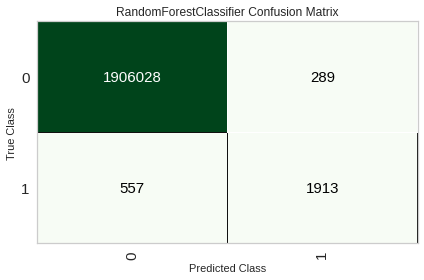

In [11]:
plot_model(lr, plot = 'confusion_matrix')

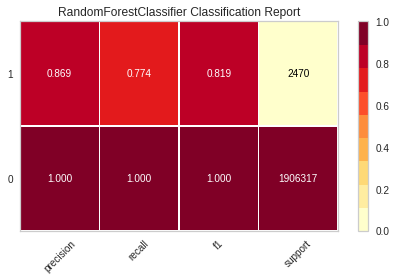

In [18]:
plot_model(lr, plot = 'class_report')

In [9]:
save_model(lr, 'rfmodel')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='isFraud',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
                                         max_l